# Project - Featurization, Model Selection & Tuning
### By Ajay Kumar

DOMAIN: Semiconductor manufacturing process

• CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific 
monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers 
typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature 
selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors 
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning 
and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out 
different combinations of features, essential signals that are impacting the yield type can be identified.

• DATA DESCRIPTION: sensor-data.csv : (1567, 592)

The data consists of 1567 examples each with 591 features. 

The dataset presented in this case represents a selection of such features where each example represents a single production entity with 
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to 
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the 
features are required to build the model or not

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
# Importing the necesary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Import and explore the data

In [134]:
df = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/Featurization and Model tuning /signal-data.csv')

In [135]:
# Checking the shape and head of the dataset
print(df.shape)
df.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [136]:
# Checking the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


The dataset has 1567 entries and 592 features. 

In [137]:
# Droping the variable Time which is usless
df.drop('Time', axis=1, inplace=True)
# Renaming Pass/Fail column with Fail
df.rename(columns={'Pass/Fail':'Fail'}, inplace=True)

## 2. Data cleansing:
• Missing value treatment.

• Drop attribute/s if required using relevant functional knowledge.

• Make all relevant modifications on the data using both functional/logical reasoning/assumptions

In [138]:
# Checking the null values
df.isna().sum()

0        6
1        7
2       14
3       14
4       14
        ..
586      1
587      1
588      1
589      1
Fail     0
Length: 591, dtype: int64

The  Atributes of the dataset have some null values 

## Missing Value Ratio

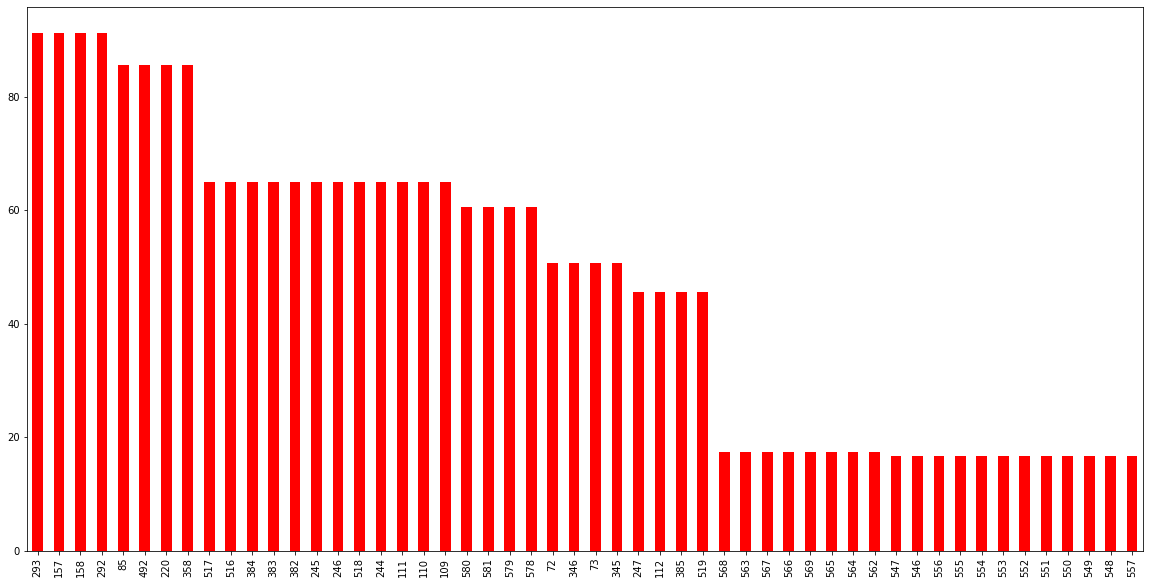

In [141]:
# checking the percentage of missing values in each variable
import plotly.express as px
a =df.isna().sum()*100/df.shape[0]
a = a[a>10].sort_values(ascending=False)
a.plot(kind ='bar', color='red', figsize=(20,10));

The above bar plot shows the percentage of missing values in the dataset which needs to be treated. Droping the variables having more than 30% missing values bacause they do not offer much value in prediction 

In [9]:
# Saving missing values in variable
a = df.isna().sum()*100/df.shape[0]

# saving column names in a variable
variables = df.columns
variable = []
for i in range(1,591):
  if a[i] >= 30:  # Setting the threshold as 30%
    variable.append(variables[i])

In [10]:
# Storing the variables in a array 
print(len(variable))
print(np.array(variable))

32
['72' '73' '85' '109' '110' '111' '112' '157' '158' '220' '244' '245'
 '246' '247' '292' '293' '345' '346' '358' '382' '383' '384' '385' '492'
 '516' '517' '518' '519' '578' '579' '580' '581']


There are 32 features having more than 30% null values.

In [11]:
# Droping the varibles which has 16% or more missing values and Time variable.
df.drop({'72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358',
       '382', '383', '384', '385', '492', '516', '517', '518', '519',
       '578', '579', '580', '581'}, axis=1, inplace=True)

In [12]:
# Features filled with zero. Many features have only 1 value, i.e. 0 throughout needs to be treated
b = pd.cut(df.var().round(2), [-0.1,0,0.1,0.2,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
b

(-0.1, 0.0]        245
(0.0, 0.1]          59
(0.1, 0.2]          10
(0.2, 1.0]          18
(1.0, 10.0]         51
(10.0, 50.0]        46
(50.0, 100.0]       20
(100.0, 500.0]      31
(500.0, 1000.0]     11
(1000.0, inf]       68
dtype: int64

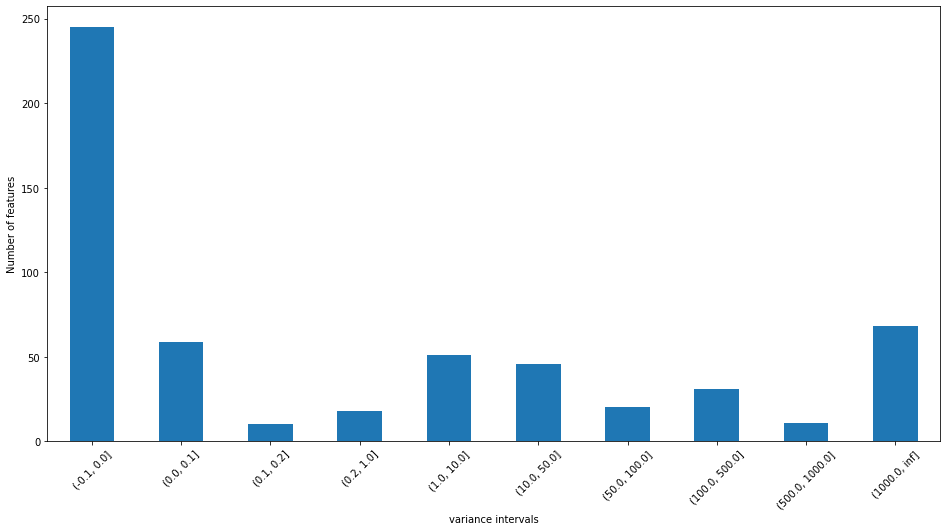

In [144]:
b.plot(kind='bar', figsize=(16,8))
plt.xlabel('variance intervals')
plt.ylabel('Number of features')
plt.xticks(rotation=45)
plt.show()

Features with low variance:

There are 245 features filled between -0.1 and 0.0

59 faetures filled between 0 and 0.1

10 features filled with 0.1 and 0.2

other informations can visualize from obove bar graph

In [14]:
# Droping the features having low variance
c = df.drop('Fail',1).var().round(2)
low_var_features = c[c<=0.1].index.tolist()
print(len(low_var_features))
print(low_var_features)

304
['5', '7', '8', '9', '10', '11', '13', '17', '19', '20', '25', '26', '30', '37', '42', '44', '47', '49', '52', '53', '54', '56', '57', '58', '61', '69', '74', '75', '76', '77', '78', '79', '80', '81', '82', '84', '86', '87', '89', '91', '92', '93', '94', '95', '96', '97', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '113', '114', '116', '118', '119', '120', '121', '123', '124', '125', '126', '127', '128', '130', '131', '132', '141', '143', '144', '145', '146', '147', '149', '153', '156', '163', '164', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '181', '184', '186', '189', '190', '191', '192', '193', '194', '206', '210', '211', '212', '213', '214', '215', '216', '217', '219', '221', '222', '224', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '248', '249', '251', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '26

In [15]:
signal = df.drop(np.unique(low_var_features).tolist(),1)
print(signal.shape)
signal.head()

(1567, 255)


,0,1,2,3,4,6,12,14,15,16,18,21,22,23,24,27,28,29,31,32,33,34,35,36,38,39,40,41,43,45,46,48,50,51,55,59,60,62,63,64,...,500,510,511,520,521,522,523,524,525,526,527,539,540,541,545,546,547,548,549,550,551,553,554,555,556,557,561,562,564,566,568,569,570,572,574,576,577,585,589,Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,192.3963,-5419.00,2916.50,-4043.75,751.00,3.0490,64.2333,2.0222,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,86.9555,117.5132,61.29,4.515,352.7173,130.3691,723.3092,141.2282,624.3145,218.3174,2834.0,-1.7264,350.9264,108.6427,16.1445,21.7264,...,0.0000,64.6707,0.0000,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,5.7349,0.3363,39.8842,3.2687,1.0297,42.3877,NaN,NaN,NaN,NaN,NaN,533.8500,8.95,3.0624,1.6765,14.9509,2.3630,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,191.2872,-5441.50,2604.25,-3498.75,-1640.25,7.3900,68.4222,2.2667,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,87.5241,118.1188,78.25,2.773,352.2445,133.1727,724.8264,145.8445,631.2618,205.1695,2853.0,0.8073,352.0073,113.9800,10.9036,19.1927,...,0.0000,141.4365,0.0000,1.6292,0.0,26.3970,0.0673,6.6475,3.1310,0.8832,8.8370,1.7910,2.9799,9.5796,7.116,1.3526,408.798,74.640,0.7193,16.00,1.33,7.1196,0.4989,53.1836,3.9139,1.7819,18.1087,NaN,NaN,NaN,NaN,NaN,535.0164,5.92,2.0111,1.1065,10.9003,4.4447,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,192.7035,-5447.75,2701.75,-4047.00,-1916.50,7.5788,67.1333,2.3333,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,84.7327,118.6128,14.37,5.434,364.3782,131.8027,734.7924,141.0845,637.2655,185.7574,2936.0,23.8245,364.5364,115.6273,11.3019,16.1755,...,0.0000,240.7767,244.2748,2.9626,0.0,14.5293,0.0751,7.0870,12.1831,0.6451,6.4568,2.1538,2.9667,9.3046,7.116,0.7942,411.136,74.654,0.1832,16.16,0.85,7.1619,0.3752,23.0713,3.9306,1.1386,24.7524,267.064,1.10,0.4122,0.4119,68.8489,535.0245,11.21,4.0923,2.0952,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,192.1557,-5468.25,2648.25,-4515.00,-1657.25,7.3145,62.9333,2.6444,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,86.6867,117.0442,76.90,1.279,363.0273,131.8027,733.8778,142.5427,637.3727,189.9079,2936.0,24.3791,361.4582,116.1818,13.5597,15.6209,...,711.6418,113.5593,0.0000,2.4416,0.0,13.2699,0.0977,5.4751,6.7553,0.7404,6.4865,2.1565,3.2465,7.7754,7.116,1.1650,372.822,72.442,1.8804,131.68,39.33,56.9303,17.4781,161.4081,35.3198,54.2917,62.7572,268.228,7.32,3.5611,2.7290,25.0363,530.5682,9.33,2.8971,1.7585,8.5831,2.0544,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,191.6037,-5476.25,2635.25,-3987.50,117.00,7.2748,62.8333,3.1556,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,86.1468,121.4364,76.39,2.209,353.3400,176.3136,789.7523,138.0882,667.7418,233.5491,2865.0,-12.2945,355.0809,144.0191,21.9782,32.2945,...,0.0000,148.0663,0.0000,2.5512,0.0,18.7319,0.0616,4.4146,2.9954,2.2181,6.3745,2.0579,1.9999,9.4805,7.116,1.4636,399.914,79.156,1.0388,19.63,1.98,9.7608,0.8311,70.9706,4.9086,2.5014,22.0500,NaN,NaN,NaN,NaN,NaN,532.0155,8.83,3.1776,1.6597,10.9698,99.3032,73.8432,-1


In [146]:
# Calculating the VIF score of the features to check the multicolinearity i.e high VIF (>10) value
signal1 = signal.drop('Fail',1)
vif = pd.Series(np.linalg.inv(signal1.corr().values).diagonal(),index=signal1.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
vif = vif[vif>10].sort_values(ascending=False)
vif

209    4.081603e+14
347    1.245235e+14
478    6.226175e+13
34     2.622633e+09
36     2.622575e+09
           ...     
28     1.113000e+01
27     1.112000e+01
6      1.093000e+01
115    1.085000e+01
90     1.078000e+01
Name: VIF, Length: 178, dtype: float64

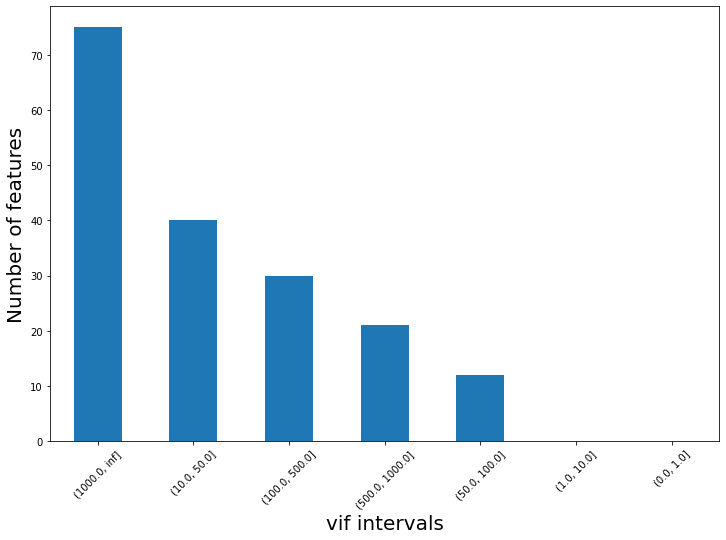

In [151]:
signal1 = pd.cut(vif.round(1),[0,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
signal1.sort_values(ascending=False).plot(kind='bar',figsize=(12,8))
plt.xlabel('vif intervals', fontsize=20)
plt.ylabel('Number of features', fontsize=20)
plt.xticks(rotation=45)
plt.show()

There are several highly multicollinear (high vif value) features. Generally vif>10 is considered as high. removing these features from the dataset

In [18]:
# Creating the function with empty list to store all the high VIF features
def capture_vif(signal1,limit):
    high_vif = []
    while 1:
        temp_vif = pd.Series(np.linalg.inv(signal1.corr().values).diagonal(),index=signal1.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
        maxi = temp_vif.max()
        if maxi>limit:
            high_vif = temp_vif[temp_vif == maxi].index.tolist()[0]
            signal1 = signal1.drop(high_vif,1)
        else:
            return signal1
    return

In [19]:
# Craeting a function to remove features with vif>10
df2 = capture_vif(signal, 10)
print(df2.shape)
df2.head()

(1567, 145)


,0,1,2,3,6,14,15,18,21,22,23,24,27,28,29,31,32,33,35,36,38,39,40,41,43,45,48,51,55,59,64,68,71,83,88,90,98,115,117,122,...,484,485,486,487,488,489,491,493,494,496,499,500,510,511,520,521,523,525,526,527,539,540,541,545,546,547,548,551,553,555,561,562,568,569,570,574,577,585,589,Fail
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,7.9558,414.8710,192.3963,-5419.00,2916.50,-4043.75,751.00,3.0490,64.2333,2.0222,3.5191,83.3971,9.5126,64.2588,49.3830,86.9555,117.5132,61.29,4.515,352.7173,130.3691,141.2282,218.3174,2834.0,-1.7264,21.7264,148.6009,84.0793,7.2163,1747.6049,8671.9301,0.3974,748.6115,58.4306,2.639,...,494.6996,178.1759,843.1138,0.0000,53.1098,0.0000,0.7578,2.9570,2.1739,17.1202,0.0000,0.0000,64.6707,0.0000,1.9864,0.0,0.1094,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,7.116,1.0616,395.570,75.752,0.78,5.7349,39.8842,42.3877,NaN,NaN,NaN,533.8500,3.0624,14.9509,2.3630,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,10.1548,414.7347,191.2872,-5441.50,2604.25,-3498.75,-1640.25,7.3900,68.4222,2.2667,3.4171,84.9052,9.7997,64.2828,49.3404,87.5241,118.1188,78.25,2.773,352.2445,133.1727,145.8445,205.1695,2853.0,0.8073,19.1927,154.3709,82.3494,6.8043,1931.6464,8407.0299,-0.9353,731.2517,58.6680,2.541,...,0.0000,359.0444,130.6350,820.7900,194.4371,0.0000,3.6822,3.2029,0.1441,12.6788,0.0000,0.0000,141.4365,0.0000,1.6292,0.0,0.0673,3.1310,0.8832,8.8370,1.7910,2.9799,9.5796,7.116,1.3526,408.798,74.640,1.33,7.1196,53.1836,18.1087,NaN,NaN,NaN,535.0164,2.0111,10.9003,4.4447,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,9.5157,416.7075,192.7035,-5447.75,2701.75,-4047.00,-1916.50,7.5788,67.1333,2.3333,3.5986,84.7569,8.6590,64.1114,49.8470,84.7327,118.6128,14.37,5.434,364.3782,131.8027,141.0845,185.7574,2936.0,23.8245,16.1755,145.8000,84.7681,7.1041,1685.8514,9317.1698,-0.1427,718.5777,58.4808,2.882,...,0.0000,190.3869,746.9150,74.0741,191.7582,250.1742,1.0281,3.9238,1.5357,18.9849,0.0000,0.0000,240.7767,244.2748,2.9626,0.0,0.0751,12.1831,0.6451,6.4568,2.1538,2.9667,9.3046,7.116,0.7942,411.136,74.654,0.85,7.1619,23.0713,24.7524,267.064,0.4119,68.8489,535.0245,4.0923,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,104.2367,9.6052,422.2894,192.1557,-5468.25,2648.25,-4515.00,-1657.25,7.3145,62.9333,2.6444,3.3813,84.9105,8.6789,64.1125,49.4900,86.6867,117.0442,76.90,1.279,363.0273,131.8027,142.5427,189.9079,2936.0,24.3791,15.6209,147.6545,70.2289,7.5925,1752.0968,8205.7000,0.0177,709.0867,58.6635,3.132,...,305.7500,88.5553,104.6660,71.7583,0.0000,336.7660,1.7670,3.1817,0.1488,29.2542,0.0000,711.6418,113.5593,0.0000,2.4416,0.0,0.0977,6.7553,0.7404,6.4865,2.1565,3.2465,7.7754,7.116,1.1650,372.822,72.442,39.33,56.9303,161.4081,62.7572,268.228,2.7290,25.0363,530.5682,2.8971,8.5831,2.0544,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,10.5661,420.5925,191.6037,-5476.25,2635.25,-3987.50,117.00,7.2748,62.8333,3.1556,3.2728,86.3269,8.7677,64.1511,49.7520,86.1468,121.4364,76.39,2.209,353.3400,176.3136,138.0882,233.5491,2865.0,-12.2945,32.2945,146.6636,65.8417,7.5017,1828.3846,9014.4600,-0.6704,796.5950,58.3858,3.148,...,461.8619,240.1781,0.0000,587.3773,748.1781,0.0000,2.2358,3.2712,0.0372,107.6905,293.1396,0.0000,148.0663,0.0000,2.5512,0.0,0.0616,2.9954,2.2181,6.3745,2.0579,1.9999,9.4805,7.116,1.4636,399.914,79.156,1.98,9.7608,70.9706,22.0500,NaN,NaN,NaN,532.0155,3.1776,10.9698,99.3032,73.8432,-1


All the features having VIF score more than 10 have been droped

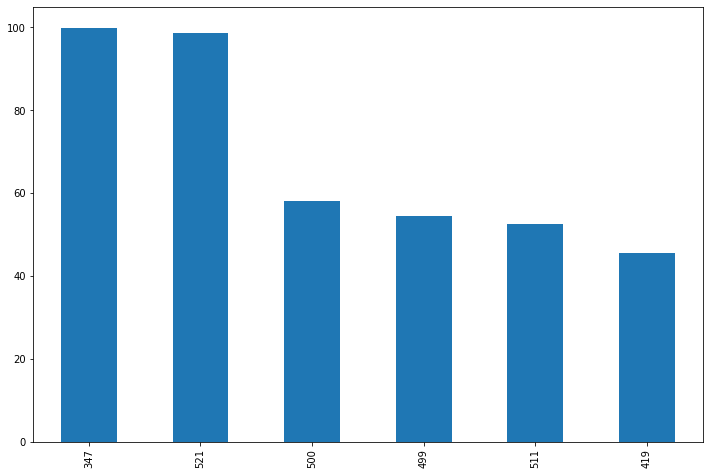

In [20]:
# Checking the features with most no. of zero values and NaN
d = ((df2==0).sum() + df2.isna().sum())*100/df2.shape[0]
d[d>35].sort_values(ascending=False).plot(kind='bar',figsize=(12,8));

In [21]:
zero_missing = d[d>35].index.tolist()
print(len(zero_missing))
print(zero_missing)

6
['347', '419', '499', '500', '511', '521']


There are 9 features having 30% or more zeroes plus NaN values. 

Droping such features which contributes very less in model biulding

In [22]:
# Droping the features with more than 35% zeros and missing values
df2.drop(np.unique(zero_missing).tolist(),1, inplace=True)
print(df2.shape)

(1567, 139)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

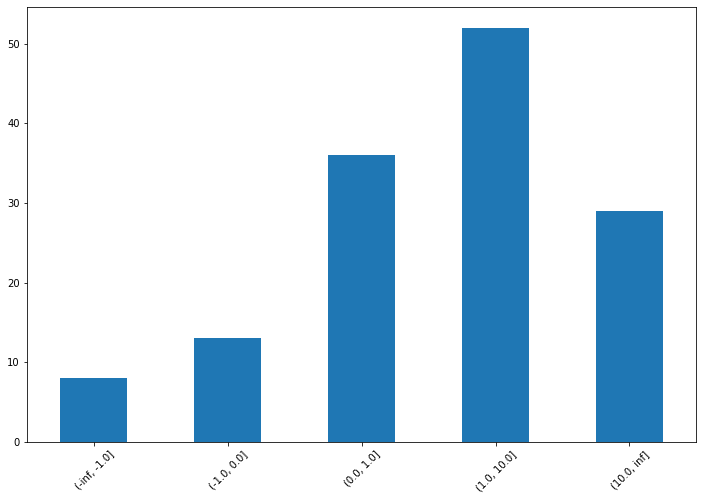

In [23]:
# Checking the skewness of the dataset
df = df2.drop('Fail',1)
df = pd.cut(df.skew().round(1), [float('-inf'), -1,0,1,10,float('inf')]).value_counts().sort_index()
df.plot(kind='bar',figsize=(12,8));
plt.xticks(rotation = 45)

Generally, skewness of more than +1 or less than -1, is considered as high. In this case, skewness is extremely high, i.e. the distribution of many features are highly non-normal and are expected to have extreme outliers, which could affect the prediction accuracies of many classifiers

In [24]:
# checking for the outliers in the features to get a better understanding
# percentage of outliers for each numerical column
def IQR_outliers(data, limit = 1.5):
  numcol = data.select_dtypes(include=np.number).columns.tolist()
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((data[numcol] < (Q1 - 1.5*IQR)) | (data[numcol] > (Q3 + 1.5*IQR))).sum()*100/data.shape[0]
  return outliers

Text(0, 0.5, 'No. of outliers')

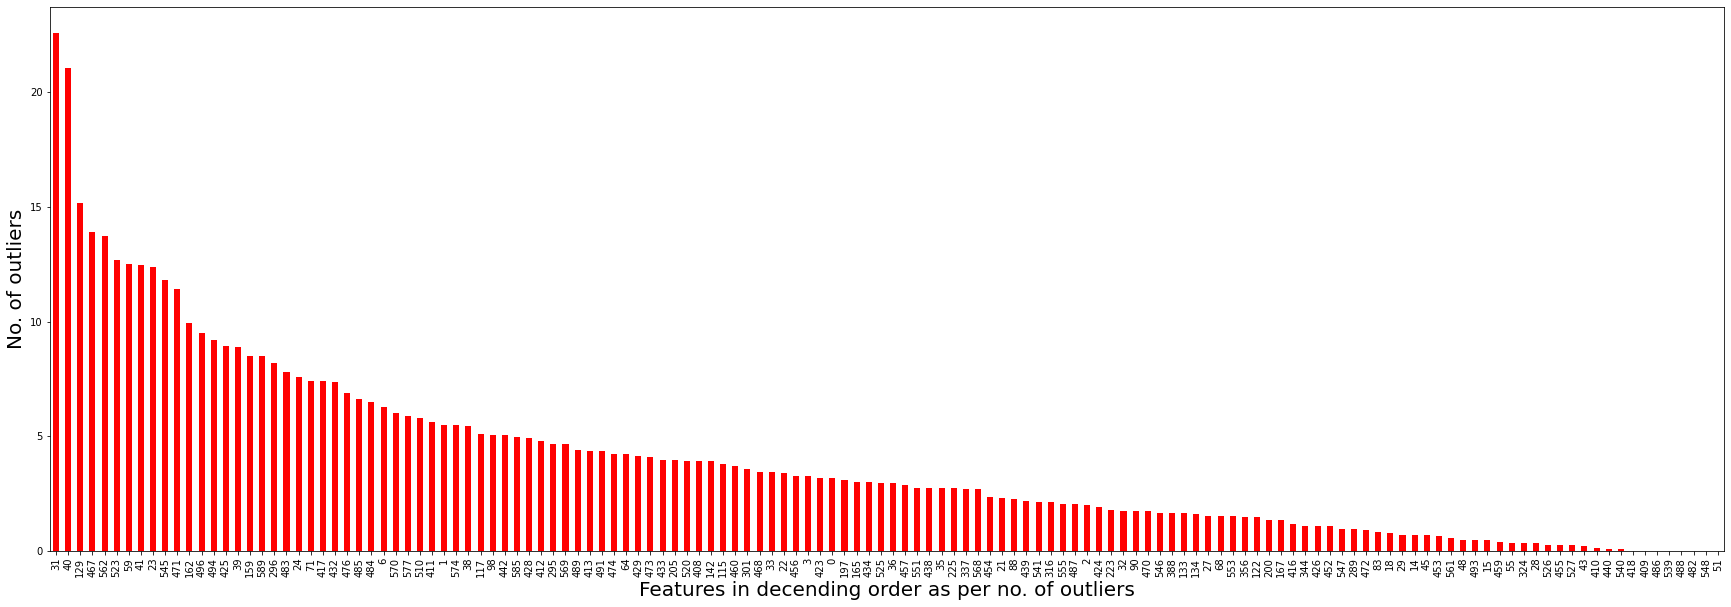

In [25]:
df = df2.drop('Fail',1).copy()
outliers = IQR_outliers(df)
outliers.sort_values(ascending=False).plot(kind='bar', figsize= (30,10), color='red');
plt.xlabel('Features in decending order as per no. of outliers', fontsize=20)
plt.ylabel('No. of outliers', fontsize=20)

The features are arranged in decending order as per no. of outliers

Feature 31 is having more than 20 outliers and so on.

Rather than dropping or manipulating outliers from the data, it might be better to use transformation (quantile transformation) to increase normality in the data, and thereby reducing the number of IQR outliers and skewness without any data loss

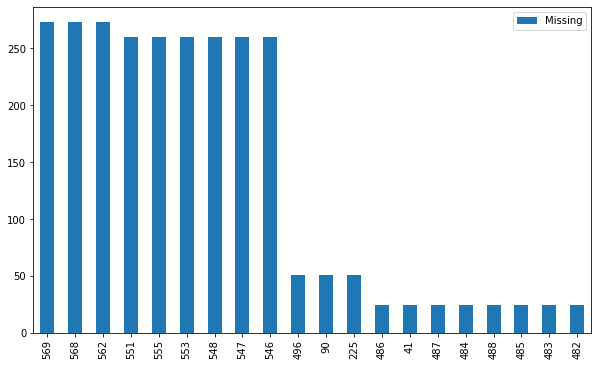

In [26]:
# Checking for the missing value 
pd.DataFrame(df2.isna().sum(), columns=['Missing']).sort_values('Missing',ascending=False).head(20).plot(kind='bar',figsize=(10,6));

Features are arranged in decending order as per the no. of null values.

I am considering the null values captured by sensors as zeros so replacing the nan values with zero.

In [27]:
# Replacing the NaN values with zero(0) as NaN data recieved at a specific time is almost zero(0) value   
df = df2.replace(np.nan, 0)
df.isna().sum().any()

False

Now, the dataset has no missing value after imputation using 'median' strategy.

## 3. Data analysis & visualisation:

• Perform detailed relevant statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [28]:
# Detailed relevant statistical analysis on the data
df.describe()

,0,1,2,3,6,14,15,18,21,22,23,24,27,28,29,31,32,33,35,36,38,39,40,41,43,45,48,51,55,59,64,68,71,83,88,90,98,115,117,122,...,474,476,482,483,484,485,486,487,488,489,491,493,494,496,510,520,523,525,526,527,539,540,541,545,546,547,548,551,553,555,561,562,568,569,570,574,577,585,589,Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,100.209538,8.988130,412.295188,189.683511,-5611.222719,2695.933153,-3801.441661,-298.217028,6.630155,69.410828,2.363177,3.668501,85.283010,8.954560,64.514590,49.385834,86.781161,118.603818,66.864885,3.301711,355.312012,136.655796,139.882906,157.320531,2848.881302,2.947018,20.450345,146.873043,103.929560,7.447311,1807.815021,8540.233496,-0.018073,747.383792,58.625908,3.875999,...,37.468920,20.055069,313.541586,203.400481,211.991606,198.031523,297.873034,235.787855,347.215842,268.001186,2.423967,2.530046,0.956442,28.893873,55.692336,2.695999,0.453896,5.475235,1.443457,6.395717,3.018744,1.932909,9.562558,7.601689,0.867133,336.589181,63.122905,1.026509,6.425630,48.165108,32.264353,216.957377,2.025161,17.438590,530.523623,9.162315,16.642363,3.065869,99.606461,-0.867262
std,200.204648,184.815753,209.206773,458.937272,11.363940,2.821529,24.945317,8.762332,657.774591,310.647785,1385.963301,2900.855558,1.265856,4.257396,0.417084,0.550829,2.958325,1.362954,3.047065,1.719341,2.238656,3.500339,25.293018,2.378211,10.932313,8.573454,5.740975,61.035343,146.441899,9.512941,5.151917,10.043772,32.242019,0.549349,53.537262,1614.668409,0.426292,48.949250,6.485174,0.948460,...,24.894309,14.962725,281.579849,193.055768,213.134421,218.409558,287.564803,263.455453,253.828400,228.749130,1.238045,0.973948,6.615200,24.790786,37.720271,5.702366,4.147581,3.949726,0.958428,1.888698,1.268292,0.743079,2.969120,1.342513,0.525275,150.242733,28.332409,1.324688,3.496892,38.672384,19.037484,99.925253,1.298442,12.260744,17.499736,26.920150,12.485267,3.577730,93.895701,0.498010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.075900,0.000000,0.000000,0.000000,0.000000,0.000000,-28.988200,0.000000,0.000000,0.000000,0.000000,1627.471400,0.000000,-5.271700,544.025400,52.806800,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833000,0.034200,0.000000,0.000000,0.312100,0.025800,0.000000,0.170500,2.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,317.196400,1.039500,4.582000,0.000000,0.000000,-1.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,97.762200,7.080300,406.092900,188.291900,-5932.625000,2577.875000,-4370.625000,-1474.375000,5.262400,67.377800,2.088900,3.362300,84.484350,8.580000,64.024800,49.420500,86.578300,118.015600,74.240000,2.673000,350.796800,130.719100,136.900450,115.476550,2836.000000,-1.855450,17.315000,145.188150,87.202300,7.103900,1777.47

Null values removed after data cleaning and preprocessing 

There is a very high variability in the Dataset as the mean and standard deviation are not in one scale

The minimum values of some features are zero and large -ve value. Maximum values of features have also spreaded in a large scale.

The standard deviation are also varying too much.

Overall conclusion is the dataset is not normalized.

### Univariate Analysis

In [29]:
from pylab import rcParams

In [30]:
rcParams['figure.figsize'] = 100,150

In [31]:
cols = df.select_dtypes(include=np.number).columns.tolist()

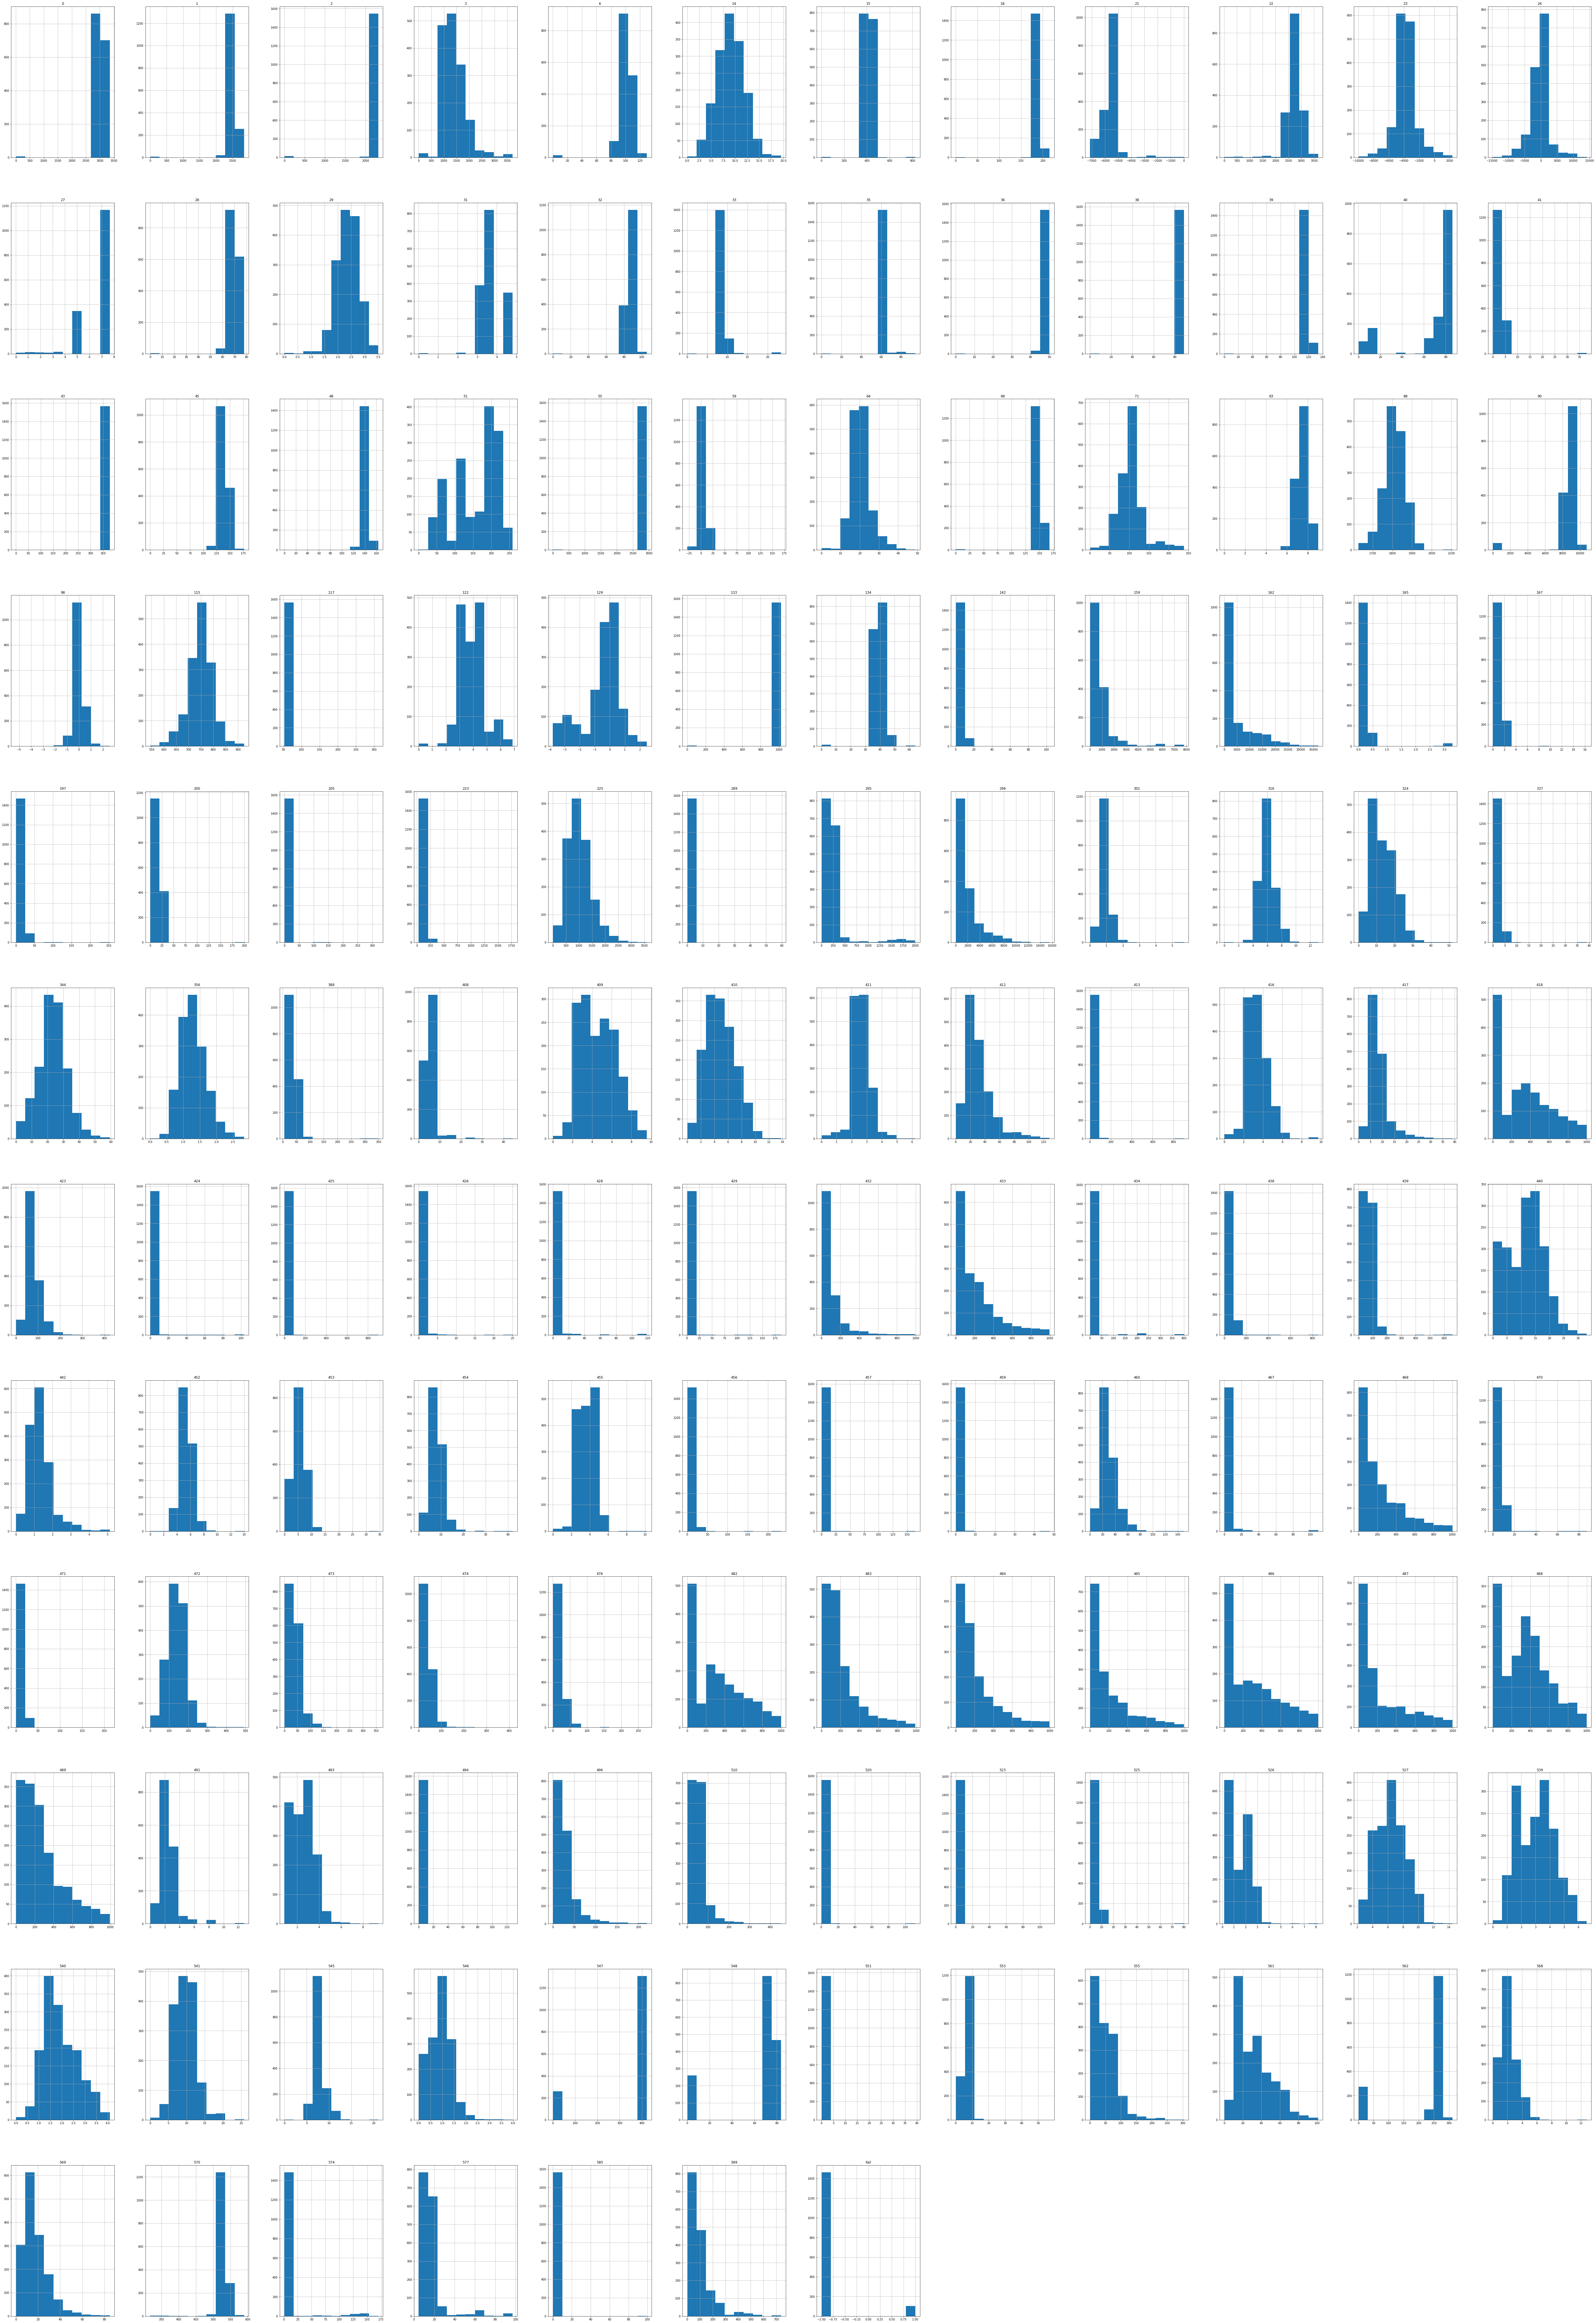

In [32]:
df[cols].hist();

After analysis the above histogram we can interpret that the only a few  features are normally distributed, most of the features are right and left skewed. 

Some features are uniformally distributed. There is a high variability in the dataset.

Many Features are have senson recording zero and null. 

# Bivariate Analysis

In [33]:
rcParams['figure.figsize'] = 15,8

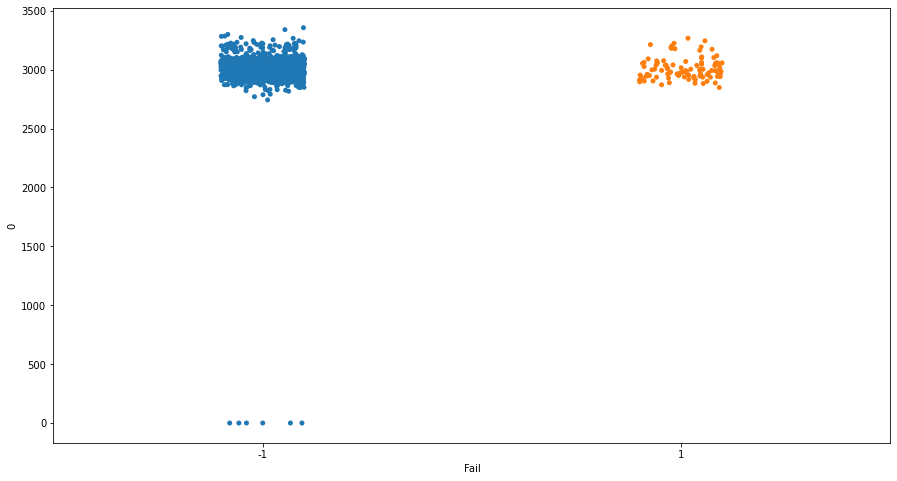

In [34]:
sns.stripplot(data=df, x='Fail', y = '0', jitter=True);

Based on the above stripplot we can predict that the data recieved from sensor 2800-3100 range has a maximum chances of failing the test

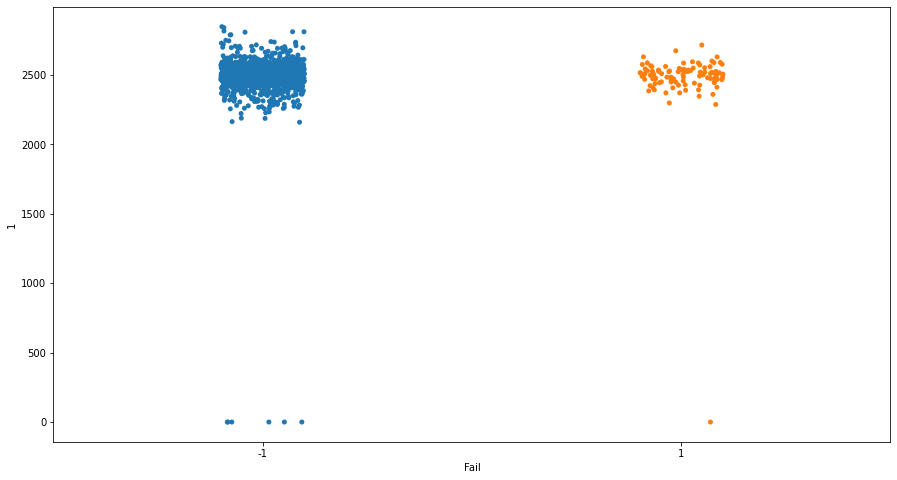

In [35]:
sns.stripplot(data=df, x='Fail', y = '1', jitter=True);

Based on the above stripplot the data recieved from sensor in 
2400-2600 range has a maximum chances of failing the test

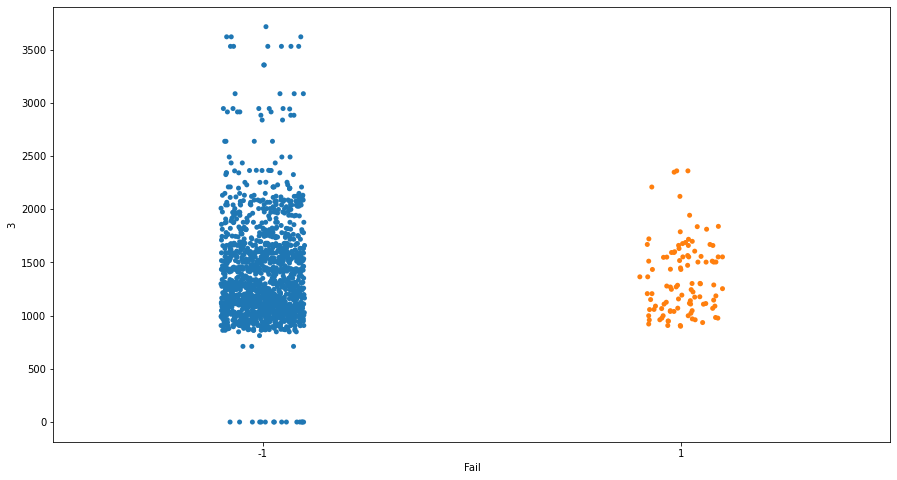

In [36]:
sns.stripplot(data=df, x='Fail', y = '3', jitter=True);

In feature 3 if data points are lying above 2400 has minimun chances if Failing the test

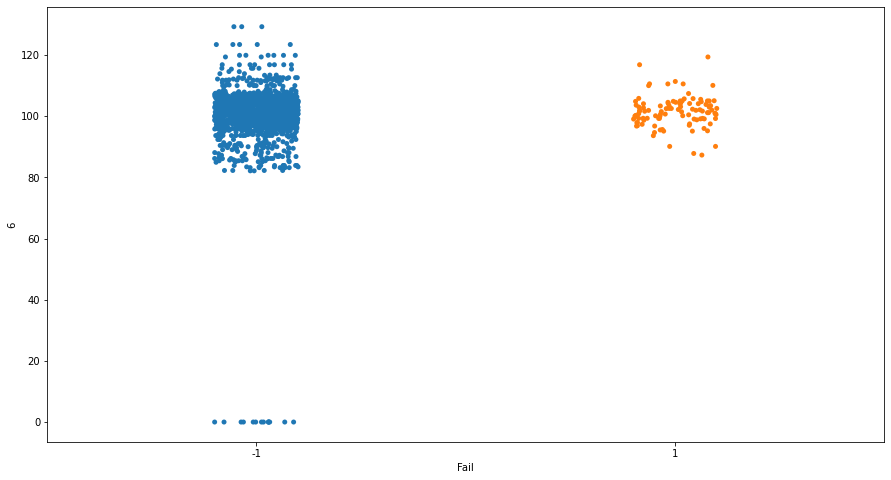

In [37]:
sns.stripplot(data=df, x='Fail', y = '6', jitter=True);

Data points lies between 90-110 has higher probability for failing the test

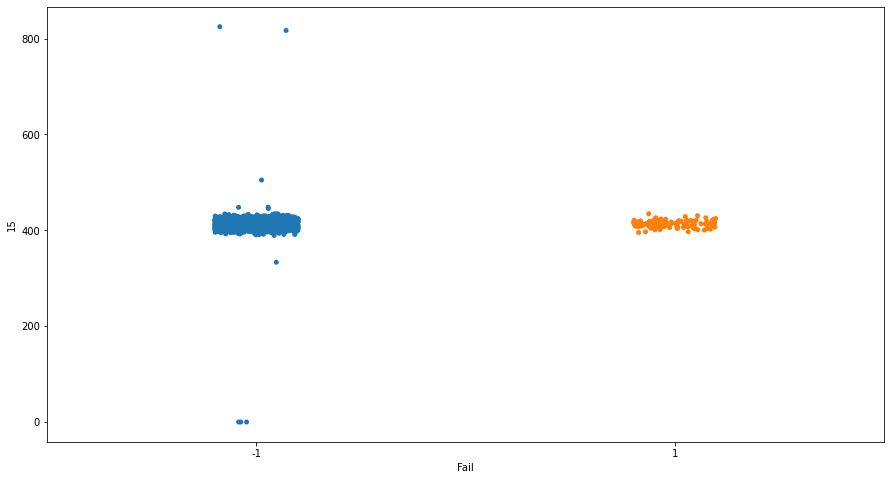

In [38]:
sns.stripplot(data=df, x='Fail', y = '15', jitter=True);

feature is not a good predictor for Pass/Fail

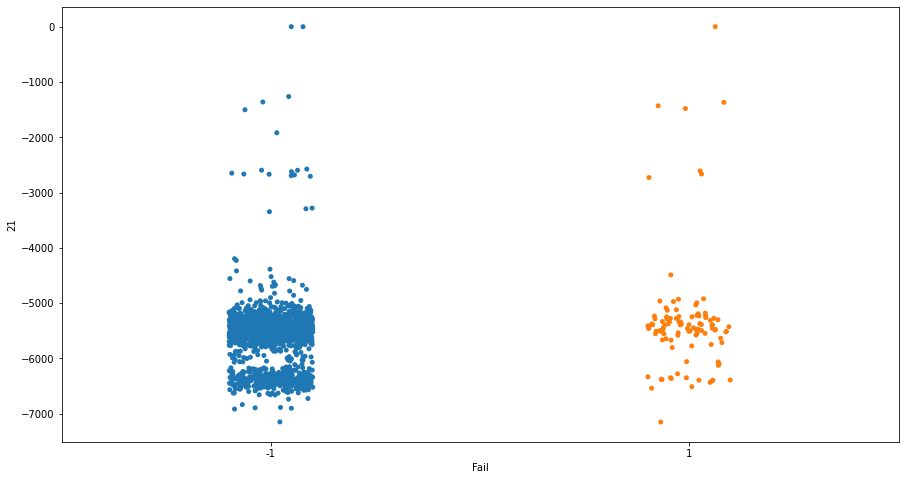

In [39]:
sns.stripplot(data=df, x='Fail', y = '21', jitter=True);

feature is not a good predictor for the traget class

# Multivariate Analysis

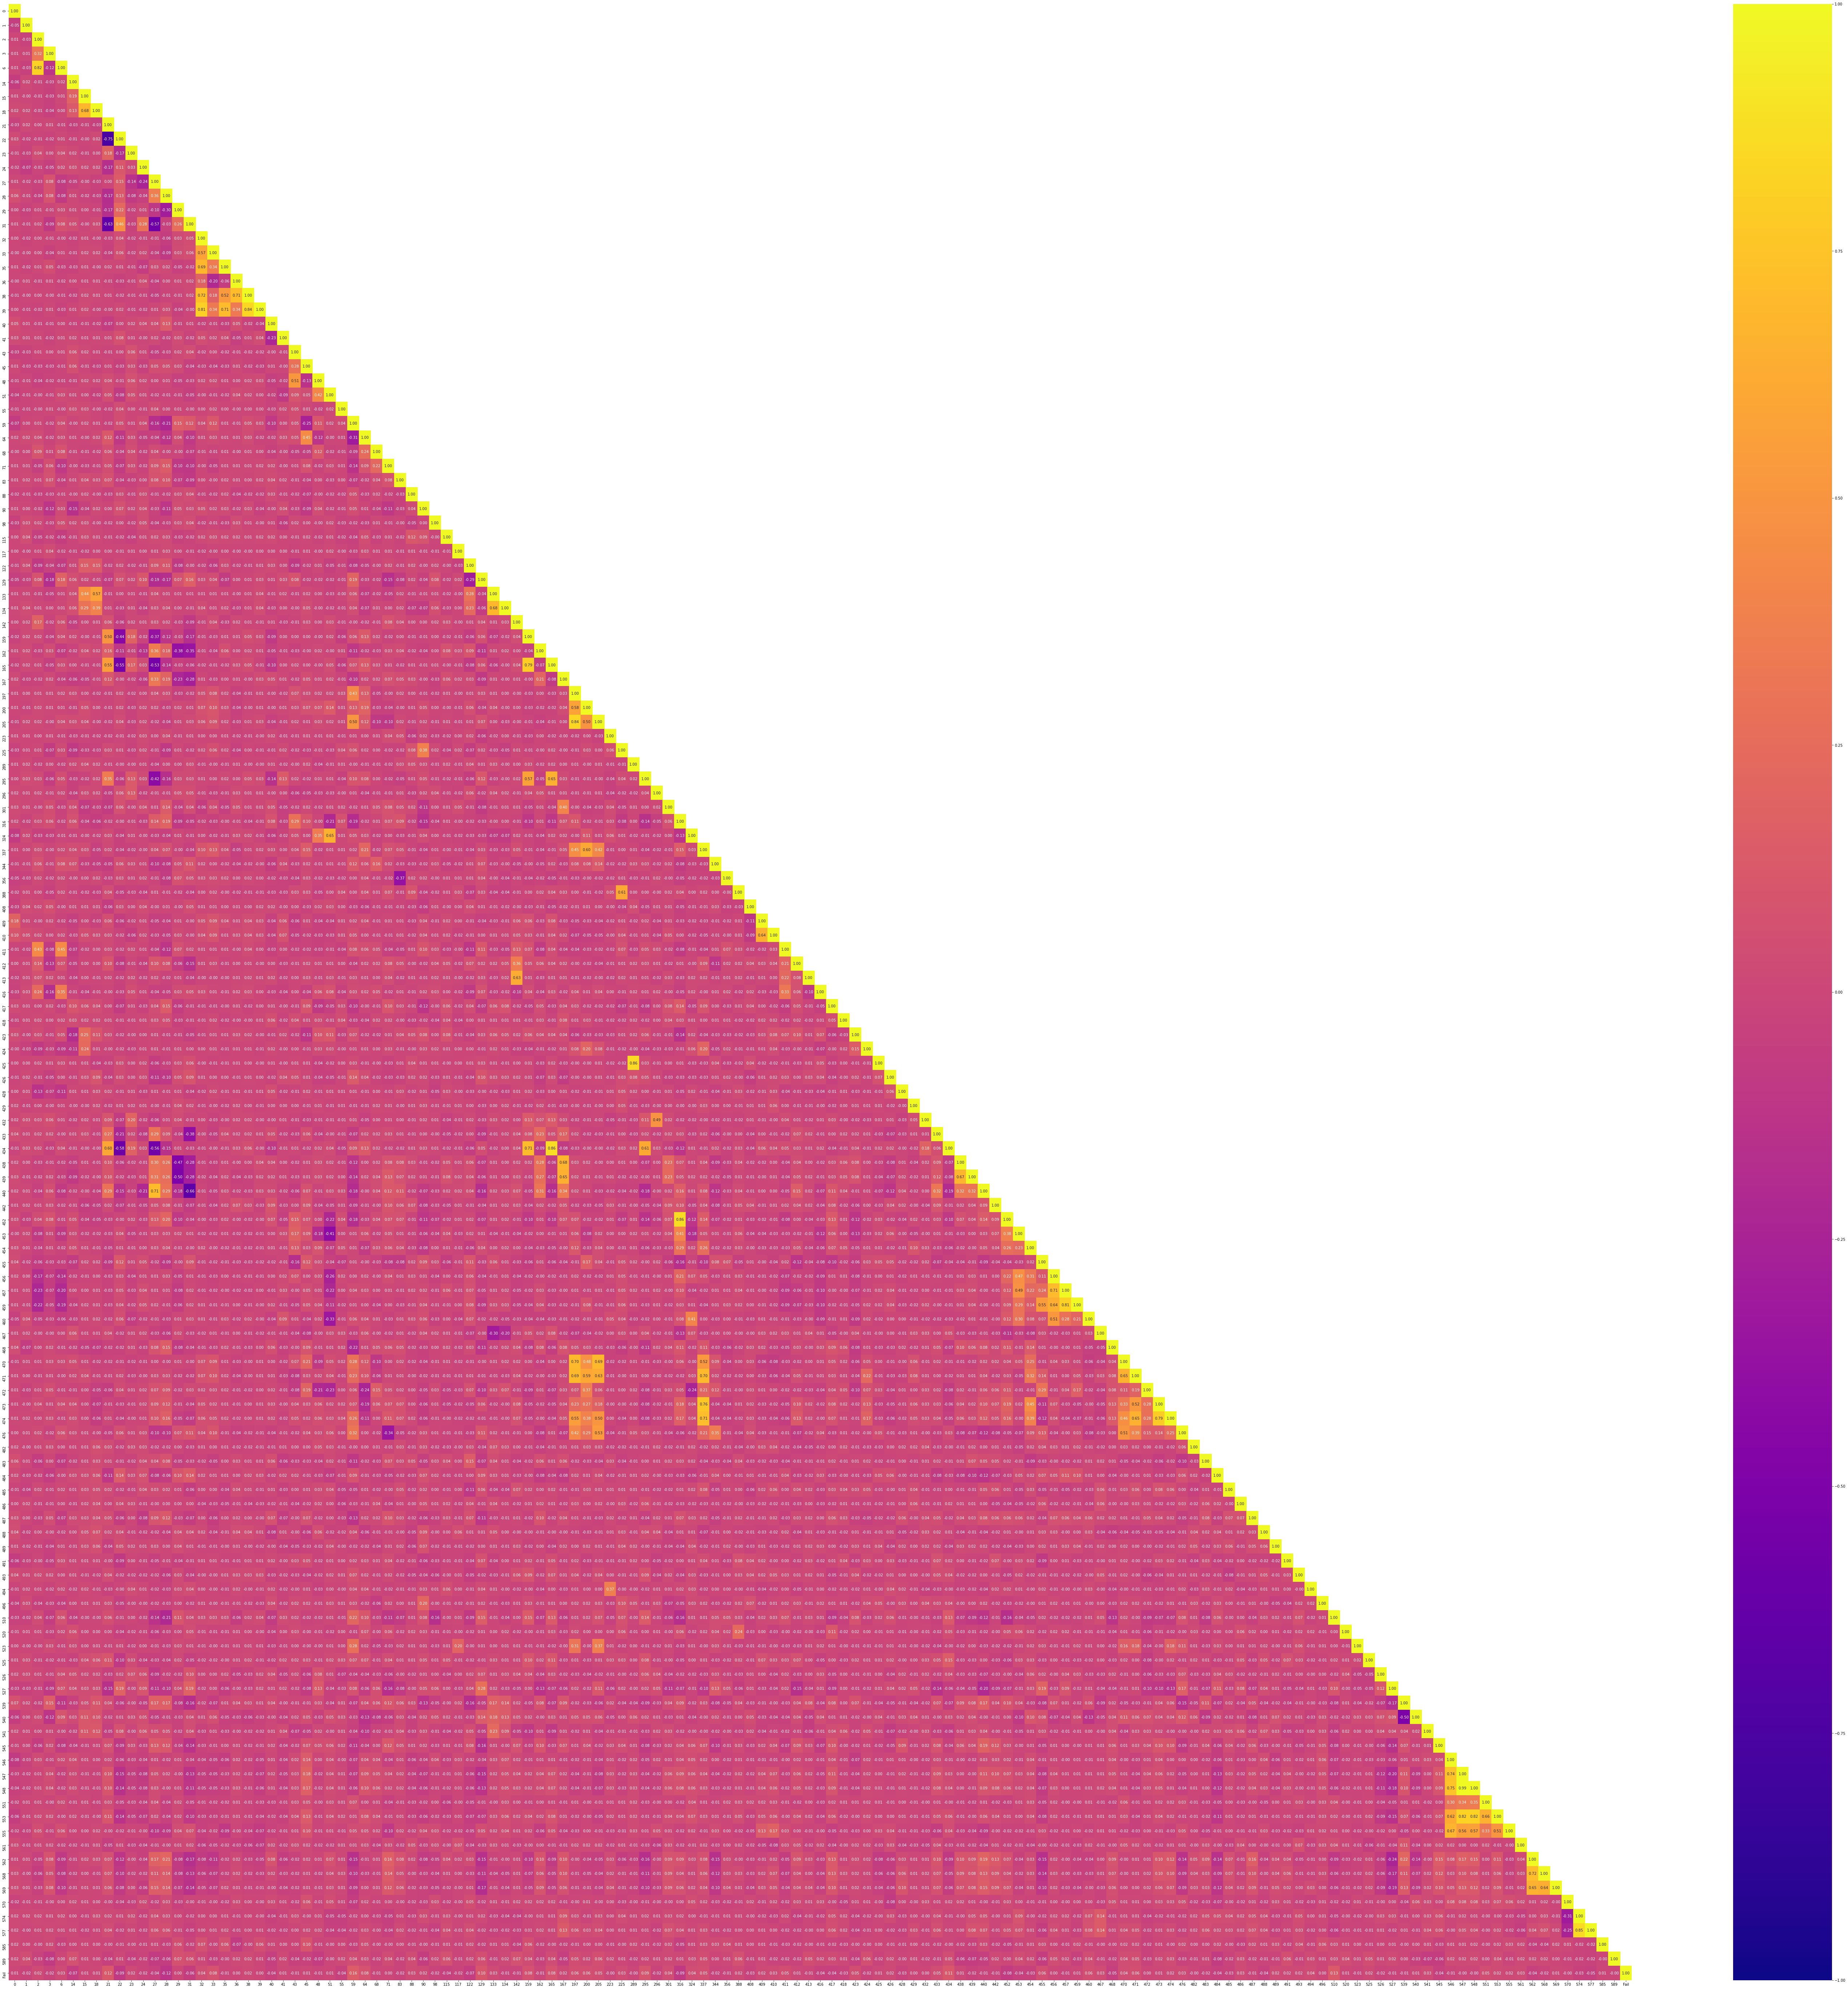

In [40]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, fmt='.2f', mask=np.triu(df.corr(),+1), cmap='plasma');

The above corelation represent that some features are highly +ve and -ve corelated to each other that might impact the accuraccy for both the Training and Testing set

## 4. Data pre-processing:
• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split and standardise the data or vice versa if required.

• Check if the train and test data have similar statistical characteristics when compared with original data

In [41]:
# Segregating predictors vs target attributes
X = df.drop('Fail', axis=1)
y = df.pop('Fail')
print(X.shape)
print(y.shape)

(1567, 138)
(1567,)


Predictor atributes have 1567 entries and 134 features
Target has 1567 entries and 1 features

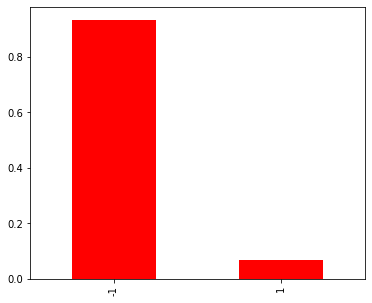

In [42]:
# Checking for target balancing and fixing it if found imbalanced.
y.value_counts(normalize=True).plot(kind='bar',color='red',figsize=(6,5));

The class of the target variable is imbalanced i.e 93% entries belongs to Fail and 7% for Pass. Most of the entries belongs to class -1. Using SMOTE algorithum to balance the class

Therefore, it might be better to use 'f1_score' as metric and imblearn and class_balance methods for classification

In [43]:
# Performing train-test split and standardising the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1175, 138)
(1175,)
(392, 138)
(392,)


In [45]:
# Normalizing the Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, scale
robust = RobustScaler()
MinMax = MinMaxScaler()
scaler = StandardScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,0,1,2,3,6,14,15,18,21,22,23,24,27,28,29,31,32,33,35,36,38,39,40,41,43,45,48,51,55,59,64,68,71,83,88,90,98,115,117,122,...,473,474,476,482,483,484,485,486,487,488,489,491,493,494,496,510,520,523,525,526,527,539,540,541,545,546,547,548,551,553,555,561,562,568,569,570,574,577,585,589
0,0.361642,1.575090,0.810087,-0.003228,1.490937,-0.763502,-0.289759,0.115922,-0.317488,-0.137833,-1.005875,-0.586751,-0.004618,-0.368534,0.411682,0.394707,-1.112851,0.047609,-0.453562,0.614072,-0.576596,0.343083,-0.330000,-0.134857,0.160187,0.362654,0.291567,0.086328,-0.186667,0.014643,-0.174150,-0.822151,-0.530320,-0.594115,0.888817,-0.473403,-0.576947,-0.116298,-1.971758,-0.253143,...,-0.135467,-0.155605,-0.258729,-0.563879,-0.117194,-0.630496,-0.261233,0.686990,-0.113709,-0.104933,0.155555,0.360573,0.590200,2.345143,0.962947,-0.031048,2.074501,3.350163,-0.183491,0.385912,-0.209606,-0.535098,1.388795,-0.168607,0.000000,1.215943,-0.816624,-0.412662,-0.030769,0.059538,1.292807,-0.465798,0.000000,0.000000,0.000000,0.133177,-0.137841,-1.081613,0.020217,-0.115404
1,-0.290360,-2.068926,0.358894,-0.332191,0.385999,-0.311921,-0.308476,0.190473,-1.503549,1.721483,-0.308659,0.531844,-0.968909,-0.687640,0.941062,7.311853,0.360353,-0.520034,-0.327923,-0.171489,-0.315130,0.170222,0.136667,-0.533714,-0.298274,-0.325915,0.507111,0.009606,-0.853333,0.384878,-0.590125,-0.035229,-1.363298,-0.653245,0.981200,-1.072030,0.487312,-0.621739,-0.530618,0.462699,...,-0.139456,0.238709,1.958181,0.301667,-0.225443,0.334126,1.828532,0.890374,-0.146609,-0.018124,-0.044280,-0.253512,0.223416,-0.056881,-0.308295,0.081971,1.041507,3.441368,-0.797129,0.695037,0.830484,-0.031156,-0.422465,0.557447,0.000000,1.385060,0.630430,0.272643,0.076923,0.127620,0.328680,0.722704,-18.868485,-1.502951,-1.511537,0.438638,0.291058,0.236117,-0.797989,2.304905
2,0.799243,-0.544756,0.818049,0.039309,-0.868121,-0.403021,-0.608669,-0.263508,0.209938,-0.650190,-0.192456,0.021646,0.019521,0.222472,0.156873,0.273303,0.623829,0.122576,-0.339044,-0.637222,-0.889125,0.158786,0.530000,0.070857,1.415985,0.513740,0.530383,-0.144076,0.640000,-0.175222,0.039173,1.183088,4.185551,0.314656,0.527955,0.653776,-0.107815,1.175222,-1.375242,0.384744,...,1.086886,1.532437,-0.174293,0.219788,-0.446034,0.437584,1.959929,0.718772,1.950696,0.707677,0.410145,-0.302863,-0.752099,-0.235237,0.155395,-0.536365,0.735895,68.302932,-0.787993,-0.639208,-0.001777,-0.814020,0.498129,0.624783,4.915482,1.003314,-1.077718,0.112754,0.953846,-0.006906,0.880470,-0.621552,-0.833786,1.904052,1.747501,-0.290652,-0.381679,-0.135522,-0.267847,1.739075
3,0.215738,0.334882,-0.469185,-0.043699,1.602191,0.245622,-0.118471,-0.672239,0.978275,-0.344106,-1.034318,0.161011,-0.074370,0.687640,0.176460,-1.276755,-1.391202,-0.028867,0.788699,0.391410,-0.871631,2.215527,0.236667,-0.557714,-0.967028,0.276346,-0.043011,-0.458515,0.026667,0.105193,-0.275887,0.539659,0.984344,-0.364775,0.573771,-17.295219,-0.501957,1.388425,1.279518,-1.781224,...,2.188117,2.373202,0.151000,-0.563879,-0.798467,-0.630496,-0.481877,-0.493837,-0.328675,-0.959743,-0.842171,-0.484261,0.416911,-0.010605,-1.366648,-0.036734,0.870960,0.361564,-2.228428,0.319546,0.141067,0.900655,0.590909,0.267871,-0.636571,0.869550,-0.011975,0.001386,0.200000,1.038667,0.017099,0.007943,0.000000,0.000000,0.000000,1.513994,-1.185714,0.695707,0.007123,0.652828
4,0.104917,-0.911979,0.146272,0.155789,0.041400,1.173475,0.002952,-0.170493,0.102818,-0.221483,-1.578137,3.131818,0.008142,0.914601,-1.490206,0.191600,-1.043205,-0.414907,0.284941,0.207737,-0.019149,0.921267,0.208333,-0.140571,0.545227,-0.986543,0.376877,0.185665,0.880000,0.708178,-0.953366,-1.502173,0.192621,-0.651696,1.255180,0.013218,0.000000,-0.126708,0.088158,0.016764,...,0.198291,0.007051,-0.786690,1.355031,1.545025,-0.055961,-0.481877,-0.027404,-0.328675,0.345660,-0.732815,1.000711,-0.064412,4.205110,0.244432,-0.344113,0.931149,-0.376221,0.397172,0.595954,-0.744973,0.773642,-0.039936,1.209287,-0.386370,-0.576698,0.455976,-0.297135,-1.138462,0.

In [48]:
X_test = pd.DataFrame(X_test, columns =X.columns)
X_test.head()

,0,1,2,3,6,14,15,18,21,22,23,24,27,28,29,31,32,33,35,36,38,39,40,41,43,45,48,51,55,59,64,68,71,83,88,90,98,115,117,122,...,473,474,476,482,483,484,485,486,487,488,489,491,493,494,496,510,520,523,525,526,527,539,540,541,545,546,547,548,551,553,555,561,562,568,569,570,574,577,585,589
0,-0.600880,0.280177,-0.753170,-0.248023,-0.217195,-0.798530,0.874241,1.093323,-0.250376,-0.375475,1.092338,-0.852572,0.048564,-0.128083,0.293983,-0.964902,-0.586842,0.285222,1.201683,0.784648,0.444444,-0.218166,-13.021667,-3.513143,1.087779,-0.144274,0.478976,0.102180,1.013333,0.367213,-0.570277,-0.283855,0.046886,-0.500352,-0.310037,-0.166174,0.063881,-0.308245,-0.373570,0.450126,...,1.421822,1.534524,0.470448,1.374520,-0.364702,1.252436,1.703848,-0.017614,0.525630,-0.655887,1.469854,1.000711,0.200637,0.244396,-0.331102,0.440940,0.157740,0.482085,0.443110,-0.781255,-0.905333,-0.744636,1.507108,-0.960150,4.771264,0.000000,-0.057995,-0.073475,0.446154,-0.157588,-0.414753,0.068906,0.000000,0.000000,0.000000,-2.076292,1.155943,-0.069606,0.007018,-0.514463
1,-0.547419,0.362635,-0.024771,-0.345076,1.761177,1.041461,-0.097671,0.889522,0.172940,-0.250000,0.283781,0.166530,0.061944,0.653925,0.352920,0.296893,-0.018651,-1.008832,0.465585,0.186415,0.331678,-1.030570,0.410000,0.521143,1.011784,0.588090,0.178869,0.151164,0.746667,-0.647795,0.570128,-0.004260,-0.313431,-0.184570,-0.210535,0.312256,1.788158,0.526005,0.762449,0.413244,...,0.173781,0.244714,0.329205,0.739107,2.381607,-0.351447,1.538652,-0.493837,-0.328675,0.603247,-0.842171,-0.148675,-0.010296,-0.435286,-0.550258,-1.040222,-0.044294,-0.009772,-0.433192,0.463513,0.086272,0.178764,0.138889,-0.651840,-0.577408,0.991757,0.048133,0.204713,0.015385,1.238574,0.138022,0.441118,0.533914,1.508295,0.794949,10.086797,141.215267,9.453976,0.358875,3.510554
2,0.084313,0.186708,-0.112356,-0.104437,-0.603194,-0.243704,-0.355210,-0.603801,-0.059368,0.895437,-0.081358,0.130568,-0.010951,-0.343820,1.254809,0.073648,0.909971,0.000000,0.397054,-0.465733,-1.041371,0.308995,0.246667,0.057143,-0.004428,0.458309,0.319701,0.688338,0.133333,-0.592409,0.507900,1.090138,1.239811,0.313529,0.545299,-0.549075,-0.723898,-0.501762,-0.961904,-0.198659,...,-0.079355,-0.314014,0.604558,0.378422,0.156165,0.470244,0.321584,0.609471,-0.328675,-0.032423,-0.777713,0.716255,-0.746758,2.071101,-0.143475,-0.414825,-0.527533,7.239414,0.626123,0.096696,1.078421,0.973670,0.032548,0.061287,-0.430373,-0.040452,-0.263912,-0.006007,-0.261538,0.000000,-0.656980,-0.491050,0.157504,2.079678,0.370940,-0.927825,0.509597,-0.595766,1.690986,0.470891
3,-0.993707,0.195539,-0.513418,-0.388582,-1.098786,-0.216427,-0.415346,0.194864,0.338567,-0.077947,-0.450144,-0.489586,0.065610,-0.323595,0.745015,-0.085731,-0.906351,-0.146058,0.388338,-1.205909,-0.913002,-0.200132,0.631667,-0.613714,1.209462,0.264709,0.027259,0.062098,0.906667,-0.117429,-0.025761,0.063706,-0.071932,0.557229,-0.748691,1.531233,0.809494,0.340199,1.398733,0.204526,...,0.416997,0.468438,-0.074662,0.481563,0.207843,0.640273,-0.481877,1.039724,1.206373,0.055997,0.233849,-0.216877,0.813359,-0.336708,0.208978,-0.346409,-0.608512,0.358306,0.201805,-0.686538,-0.419285,-0.301094,0.404134,0.422454,3.871478,-0.014277,0.691477,2.203327,0.230769,0.880857,0.172787,0.370491,0.000000,0.000000,0.000000,1.118848,-0.500436,-0.994720,0.572985,0.034652
4,-1.102523,-0.707151,0.543499,-0.427452,0.219859,-1.212312,-0.535542,-0.255059,0.202194,0.003802,-0.068474,-0.091673,0.024663,-0.152818,0.803776,-0.405639,-0.635870,0.364067,0.258792,-0.466037,0.105910,-1.755663,-0.240000,-0.452571,-0.360904,-0.326943,0.250322,-0.541839,-0.480000,3.263896,-0.094107,0.515847,-0.216857,0.509503,0.498059,-1.094007,-0.239869,-0.873330,-0.619479,0.057837,...,0.684819,0.319929,-0.581597,-0.563879,1.872260,2.971179,0.030106,0.139743,-0.084495,-0.959743,-0.377181,5.311044,0.161578,0.296457,0.111863,2.849441,0.827797,0.317590,1.668559,0.141872,-0.258236,-0.215559,-0.304994,-0.305259,0.000000,-0.392623,1.060578,1.086414,0.061538,-0.278436,0.6

Both the tarin and test data is normalliesed using robust scaler

In [49]:
# Synthetic Minority over sampling technique for balanncing the class
! pip install imblearn 


In [52]:
# Usampling the minority class using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [53]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y_train==-1)))


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_train_res==-1)))



print('After UpSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 78
Before UpSampling, counts of label '-1': 1097 

After UpSampling, counts of label '1': 1097
After UpSampling, counts of label '-1': 1097 

After UpSampling, the shape of X_train: (2194, 138)
After UpSampling, the shape of y_train: (2194,) 



After using SMOTE now both the classes for target variable is balanced which can be seen above the classes are balanced with 1097 entries each for Training Dataset.

We do not apply SMOTE on Testing data to avoide Data leakage

## 5. Model training, testing and tuning:
• Model training:

- Pick up a supervised learning model.

- Train the model. 

- Use cross validation techniques. 

Hint: Use all CV techniques that you have learnt in the course.

- Apply hyper-parameter tuning techniques to get the best accuracy. 

Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

- Use any other technique/method which can enhance the model performance.

Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

- Display and explain the classification report in detail.

- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to 
new train and test accuracies. 

Hint: You can use your concepts learnt under Applied Statistics module. 

- Apply the above steps for all possible models that you have learnt so far.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model. 

• Pickle the selected model for future use.

• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results

## Applying PCA on the dataste to remove the multicolinearity or reduce the no. of features with more than 95% captured variance

In [152]:
# Finding number of features required to capture a the 95% variance
from sklearn.decomposition import PCA

def find_pca(data,var=95, verbosity=0):
    var/=100
    for i in range(1,data.shape[1]+1):
        pca = PCA(n_components=i, random_state=1, whiten=True)
        pca_data = pca.fit_transform(data)
        if np.cumsum(pca.explained_variance_ratio_)[-1] >=var:
            if verbosity == 1:
                evr = np.cumsum(pca.explained_variance_ratio_)
                plt.figure(figsize=(12,7))
                plt.step(range(1, evr.shape[0] + 1),evr,  where='mid', label= 'Cumulative explained variance')
                plt.ylabel('Explained Variance Ratio',fontsize=15)
                plt.xlabel('Principal Components',fontsize=15)
                plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
                plt.legend()
                plt.grid()
                plt.show()                
            else:
                print(np.cumsum(pca.explained_variance_ratio_)[-1])
            break
    return i, pca

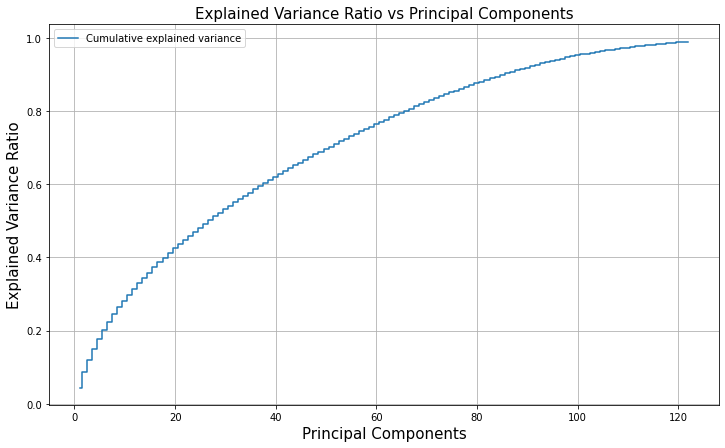

Features required to capture the 99% variance:  122


In [153]:
# Finding number of features required for capturing the total variance i.e 99%
p99, _= find_pca(scale(X),99,verbosity=1)
print('Features required to capture the 99% variance: ',p99)

By analysis the above plot I found that 99 PCs are able to capture the 95% variance in the dataset so finally using the PCA methods to reduce the dimenssion of the dataset to 99 features.

## Model training, testing and tuning using machine learning pipeline

In [56]:
# Creating the object to biuld the pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
Pca = PCA(n_components=99, random_state=1, whiten=True)
Smot = SMOTE(random_state=1)
MinMax = MinMaxScaler()
robust = RobustScaler()
Trans = QuantileTransformer(output_distribution='normal', random_state=1)

In [57]:
# svc modeel without PCA
svc = SVC(C = 40,gamma = 0.0061, kernel='rbf', random_state=1)
SVM_pipe1 = Pipeline([('trans',Trans),('minmax', MinMax),('svc', svc)])
SVM_pipe1.fit(X_train_res,y_train_res)

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=40, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.0061, kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [58]:
svc_train_score = SVM_pipe1.score(X_train_res, y_train_res).round(3)
print('Training score:', svc_train_score)
svc_test_score = SVM_pipe1.score(X_test, y_test).round(3)
print('Testing score:', svc_test_score)

Training score: 0.929
Testing score: 0.829


SVM model is slightly get overfitted and giving a 92% score for training and 80% for testing set.  

In [59]:
ytrain_predict = SVM_pipe1.predict(X_train_res)
ytest_predict = SVM_pipe1.predict(X_test)

Training score: 0.929


              precision    recall  f1-score   support

          -1       0.96      0.89      0.93      1097
           1       0.90      0.97      0.93      1097

    accuracy                           0.93      2194
   macro avg       0.93      0.93      0.93      2194
weighted avg       0.93      0.93      0.93      2194



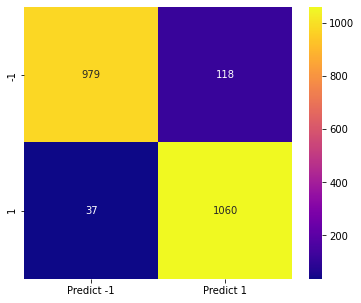

In [60]:
## Performance Matrix on Training data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Training score:', SVM_pipe1.score(X_train_res, y_train_res).round(3))
cm = metrics.confusion_matrix(y_train_res, ytrain_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_train_res, ytrain_predict))

The model has performed very well on Training Data for predicting both the classes. F1 score for both the class is 92%.

*Training data accuracy: 92%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Fail' is 96% and 88% respectivily 

  The precision and recall is also good for predicting 'Pass' is 89% and 96% respectivily 

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 1054

True Negatives (TN): we correctly predicted for Fail is 966

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 131 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 43 Falsely predict negative Type II error


Testing score: 0.829


              precision    recall  f1-score   support

          -1       0.95      0.87      0.90       366
           1       0.14      0.31      0.19        26

    accuracy                           0.83       392
   macro avg       0.54      0.59      0.55       392
weighted avg       0.89      0.83      0.86       392



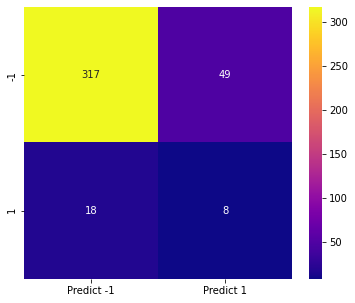

In [61]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Testing score:', SVM_pipe1.score(X_test, y_test).round(3))
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

*Test data accuracy: 83%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Fail' is 95% and 87% respectivily 

  The precision and recall is very poor for predicting 'Pass' is 14% and 31% respectivily 

The recall for Pass class is very low due to class imbalance in the dataset

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 08

True Negatives (TN): we correctly predicted for Fail is 317

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 49 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 18 Falsely predict negative Type II error


In [62]:
# svc modeel without PCA
svc = SVC(C = 40,gamma = 0.0001, kernel='rbf',random_state=1)
SVM_pipe2 = Pipeline([('trans',Trans),('minmax', MinMax),('pca', Pca),('svc', svc)])
SVM_pipe2.fit(X_train_res,y_train_res)

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=99,
                     random_state=1, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=40, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [63]:
svc_train_score_pca = SVM_pipe2.score(X_train_res, y_train_res).round(3)
print('Training score:', svc_train_score_pca)
svc_test_score_pca = SVM_pipe2.score(X_test, y_test).round(3)
print('Testing score:', svc_test_score_pca)

Training score: 0.94
Testing score: 0.834


In [64]:
ytrain_predict = SVM_pipe2.predict(X_train_res)
ytest_predict = SVM_pipe2.predict(X_test)

Testing score: 0.834


              precision    recall  f1-score   support

          -1       0.94      0.88      0.91       366
           1       0.12      0.23      0.16        26

    accuracy                           0.83       392
   macro avg       0.53      0.55      0.53       392
weighted avg       0.89      0.83      0.86       392



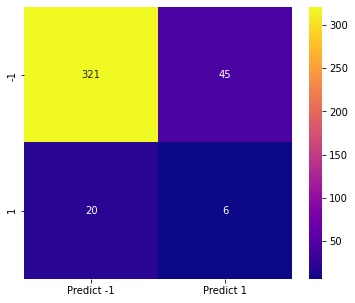

In [65]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Testing score:', SVM_pipe2.score(X_test, y_test).round(3))
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

*Test data accuracy: 83%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Fail' is 94% and 88% respectivily 

  The precision and recall is very poor for predicting 'Pass' is 12% and 23% respectivily 

The recall for Pass class is very low due to class imbalance in the dataset

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 06

True Negatives (TN): we correctly predicted for Fail is 321

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 45 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 20 Falsely predict negative Type II error


In [66]:
# Using XGBRFClassifier without PCA
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier(min_child_weight=2, max_depth=6, learning_rate=0.005, 
                      gamma=15, early_stopping_round=20, aval_metrix='auc',velocity=0, random_state=1)
xgb_pipe = Pipeline([('trans',Trans),('minmax', MinMax),('xgb', xgb)])
xgb_pipe.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('xgb',
                 XGBRFClassifier(aval_metrix='auc', base_score=0.5,
                                 colsample_bylevel=1, colsample_bynode=0.8,
                                 colsample_bytree=1, early_stopping_round=20,
                                 gamma=15, learning_rate=0.005,
                                 max_delta_step=0, max_depth=6,
                                 min_child_weight=2, missing=None,
                                 n_estimators=100, n_jobs=1, nthread=None,
                                 objective='binary:logistic', random_state=1,
           

In [67]:
xgb_train_score = xgb_pipe.score(X_train_res, y_train_res).round(3)
print('Training score:', xgb_train_score)
xgb_test_score = xgb_pipe.score(X_test, y_test).round(3)
print('Testing score:', xgb_test_score)

Training score: 0.892
Testing score: 0.791


In [68]:
ytrain_predict = xgb_pipe.predict(X_train_res)
ytest_predict = xgb_pipe.predict(X_test)

Testing score: 0.791


              precision    recall  f1-score   support

          -1       0.97      0.80      0.88       366
           1       0.18      0.62      0.28        26

    accuracy                           0.79       392
   macro avg       0.57      0.71      0.58       392
weighted avg       0.92      0.79      0.84       392



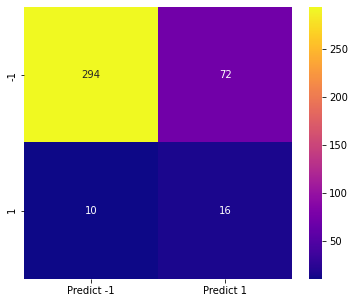

In [69]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Testing score:', xgb_pipe.score(X_test, y_test).round(3))
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

*Test data accuracy: 79%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Fail' is 97% and 80% respectivily 

  The precision and recall is very poor for predicting 'Pass' is 18% and 62% respectivily 

XGB classifier model has given very good score of recall i.e 62% for Pass class

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 16

True Negatives (TN): we correctly predicted for Fail is 294

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 72 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 10 Falsely predict negative Type II error


In [71]:
# Using XGBRFClassifier without PCA
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier(min_child_weight=2, max_depth=6, learning_rate=0.005, 
                      gamma=15, early_stopping_round=20, aval_metrix='auc',velocity=0, random_state=1)
xgb_pipe1 = Pipeline([('trans',Trans),('minmax', MinMax),('pca', Pca),('xgb', xgb)])
xgb_pipe1.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=99,
                     random_state=1, svd_solver='auto', tol=0.0, whiten=True)),
                ('xgb'...
                                 colsample_bylevel=1, colsample_bynode=0.8,
                                 colsample_bytree=1, early_stopping_round=20,
                                 gamma=15, learning_rate=0.005,
                                 max_delta_step=0, max_depth=6,
                                 min_child_weight=2, missing=None,
                                 n_estimators=100, n_j

In [72]:
xgb_train_score_pca = xgb_pipe1.score(X_train_res, y_train_res).round(3)
print('Training score:', xgb_train_score_pca)
xgb_test_score_pca = xgb_pipe1.score(X_test, y_test).round(3)
print('Testing score:', xgb_test_score_pca)

Training score: 0.913
Testing score: 0.821


In [73]:
ytrain_predict = xgb_pipe1.predict(X_train_res)
ytest_predict = xgb_pipe1.predict(X_test)

Testing score: 0.821


              precision    recall  f1-score   support

          -1       0.95      0.86      0.90       366
           1       0.13      0.31      0.19        26

    accuracy                           0.82       392
   macro avg       0.54      0.58      0.54       392
weighted avg       0.89      0.82      0.85       392



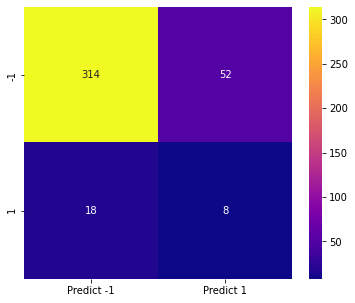

In [74]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Testing score:', xgb_pipe1.score(X_test, y_test).round(3))
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

*Test data accuracy: 82%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Fail' is 95% and 86% respectivily 

  The precision and recall is very poor for predicting 'Pass' is 13% and 31% respectivily 

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 08

True Negatives (TN): we correctly predicted for Fail is 314

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 52 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 18 Falsely predict negative Type II error


In [75]:
# Applying Ensemble techniques with PCA
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(learning_rate=0.001, max_depth=7, warm_start=True)
gbcl_pipe = Pipeline([('trans',Trans),('pca', Pca),('bgcl', gbcl)])
gbcl_pipe.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=99,
                     random_state=1, svd_solver='auto', tol=0.0, whiten=True)),
                ('bgcl',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='f...
                                            loss='deviance', max_depth=7,
                                            max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                  

In [76]:
gbcl_train_score_pca = gbcl_pipe.score(X_train_res, y_train_res).round(3)
print('Training score:', gbcl_train_score_pca)
gbcl_test_score_pca = gbcl_pipe.score(X_test, y_test).round(3)
print('Testing score:', gbcl_test_score_pca)

Training score: 0.946
Testing score: 0.804


In [77]:
ytrain_predict = gbcl_pipe.predict(X_train_res)
ytest_predict = gbcl_pipe.predict(X_test)

Testing score: 0.804


              precision    recall  f1-score   support

          -1       0.95      0.84      0.89       366
           1       0.13      0.35      0.19        26

    accuracy                           0.80       392
   macro avg       0.54      0.59      0.54       392
weighted avg       0.89      0.80      0.84       392



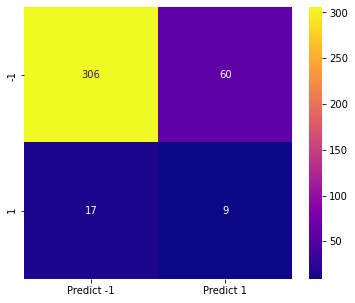

In [78]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Testing score:', gbcl_pipe.score(X_test, y_test).round(3))
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

*Test data accuracy: 80%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Fail' is 95% and 84% respectivily 

  The precision and recall is very poor for predicting 'Pass' is 13% and 35% respectivily. Needs to improve the recall value

The class is highly imbalanced causing the poor precision and recall on Pass class.

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 9

True Negatives (TN): we correctly predicted for Fail is 306

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 60 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 17 Falsely predict negative Type II error


## Applying various cross validation methods to improve the accuracy

In [79]:
# using sklearn RandomsearchCV to find the best parameters for better accuracy with PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
svc = SVC()
pipe_svc = Pipeline([('trans',Trans),('svc', svc)]) 


param_grid = {'svc__C': [10,20,30], 
              'svc__gamma': [0.001, 0.001, 0.025],
              'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit( X_train_res, y_train_res) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'svc__C': 10, 'svc__gamma': 0.025, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.93


In [81]:
svc_train_score_cv = grid.score(X_train_res, y_train_res).round(3)
print('Training score:', svc_train_score_cv)
svc_test_score_cv = grid.score(X_test, y_test).round(3)
print('Testing score:', svc_test_score_cv)

Training score: 1.0
Testing score: 0.934


In [82]:
ytrain_predict = grid.predict(X_train)
ytest_predict = grid.predict(X_test)

Testing score: 0.934


              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



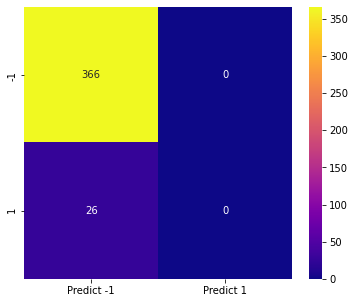

In [83]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
print('Testing score:', grid.score(X_test, y_test).round(3))
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

Using grid search on svm model is not able to predict the Pass class using diffreent technique to improve the recall of pass class

In [88]:
# 3.1 Logistic regression CV with pca
from sklearn.linear_model import LogisticRegressionCV
LR_cv = LogisticRegressionCV( scoring = 'f1', random_state=1, 
                              verbose=0, n_jobs=-1, max_iter=10000, cv=3)
LR_model1 = Pipeline([('trans',Trans),('minmax',MinMax),('pca',Pca),('LR', LR_cv)])
LR_model1.fit(X_train_res,y_train_res)

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=99,
                     random_state=1, svd_solver='auto', tol=0.0, whiten=True)),
                ('LR',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=3,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=10000, multi_class='auto',
                                      n_jobs=-1, penalty='l2', random_state=1,
                                    

In [89]:
LR_train_score_cv = LR_model1.score(X_train_res, y_train_res).round(3)
print('Training score:', LR_train_score_cv)
LR_test_score_cv = LR_model1.score(X_test, y_test).round(3)
print('Testing score:', LR_test_score_cv)

Training score: 0.913
Testing score: 0.17


In [90]:
ytrain_predict = LR_model1.predict(X_train_res)
ytest_predict = LR_model1.predict(X_test)



              precision    recall  f1-score   support

          -1       0.94      0.84      0.89       366
           1       0.12      0.31      0.17        26

    accuracy                           0.80       392
   macro avg       0.53      0.57      0.53       392
weighted avg       0.89      0.80      0.84       392



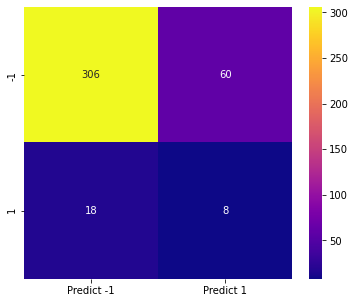

In [91]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

The logistic grid search cv model is giving moderate score of recall for the Pass class

The model has truly predicted only 08 enties for Passing the test due to highly imbalanced class 

In [119]:
# Applying Random search on 
from scipy.stats import randint as sp_randint
from time import time

svc = SVC()
pipe_svc = Pipeline([('trans',Trans),('pca',Pca),('svc', svc)]) 


param_grid = {'svc__C': [5,10,40,50], 
              'svc__gamma': [0.001, 0.001, 0.025, 0.5],
              'svc__kernel':['rbf','poly','linear']} 

samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(pipe_svc, param_distributions=param_grid, n_iter=samples) 
start = time()
randomCV.fit(X_train_res, y_train_res)

print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( X_test, y_test)))

 Best cross-validation accuracy: 0.98
 Best parameters:  {'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 50}
 Test set accuracy: 0.91


In [120]:
randomCV.best_params_

{'svc__C': 50, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [121]:
best_grid = randomCV.best_estimator_
best_grid

Pipeline(memory=None,
         steps=[('trans',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=1, subsample=100000)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=99,
                     random_state=1, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=50, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [122]:
svc_train_score_Rcv = best_grid.score(X_train_res, y_train_res).round(3)
print('Training score:', svc_train_score_Rcv)
svc_test_score_Rcv = best_grid.score(X_test, y_test).round(3)
print('Testing score:', svc_test_score_Rcv)

Training score: 1.0
Testing score: 0.913


In [123]:
ytrain_predict = best_grid.predict(X_train_res)
ytest_predict = best_grid.predict(X_test)



              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       366
           1       0.17      0.08      0.11        26

    accuracy                           0.91       392
   macro avg       0.55      0.52      0.53       392
weighted avg       0.89      0.91      0.90       392



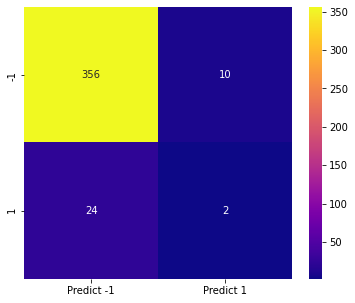

In [124]:
## Performance Matrix on test data set
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[-1,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict -1', 'Predict 1']], index=[i for i in ['-1','1']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

## Comparision of different model

In [117]:
model_comparision = pd.DataFrame({'Method':['SVC','SVC_PCA', 'XGBCLF','XGBCLF_PCA','GBCL_PCA','SVM_PCA_CV',
                                  'LR_CV_PCA','SVC_RandomSearch'],
                                  'Train_Accuracy': [svc_train_score, svc_train_score_pca, xgb_train_score,xgb_train_score_pca,
                                  gbcl_train_score_pca, svc_train_score_cv, LR_train_score_cv,svc_train_score_Rcv],
                                  'Test_Accuracy': [svc_test_score, svc_test_score_pca, xgb_test_score,xgb_test_score_pca,
                                  gbcl_test_score_pca, svc_test_score_cv, 79,svc_test_score_Rcv]})

In [118]:
model_comparision = model_comparision[['Method', 'Train_Accuracy','Test_Accuracy']]
model_comparision

,Method,Train_Accuracy,Test_Accuracy
0,SVC,0.929,0.829
1,SVC_PCA,0.940,0.834
2,XGBCLF,0.892,0.791
3,XGBCLF_PCA,0.913,0.821
4,GBCL_PCA,0.946,0.804
5,SVM_PCA_CV,1.000,0.934
6,LR_CV_PCA,1.000,79.000
7,SVC_RandomSearch,1.000,0.934


*Concl:

After camparing all the model acuuracy and classification report the XGBRFClassifier without PCA has given very good score on predicting the Pass claaa with the recall value of 63%.

Most of the models are giving very good score on Training data but very poor on testing data due highly embalanced class.

## Pickle the selected model for future use

In [127]:
import os
import pickle
filename = 'ajay.pras'
pickle.dump(xgb_pipe, open(filename, 'wb'))

The best model pickled on google drive loaction for future use

# 6. Conclusion and improvisation:
• Write your conclusion on the results.

*Final Conclusion:

The following can be interpreted on data collected for Semiconductor manufacturing process at specific time is as follow:

semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points is stored with low variance and high variance features.

During EDA it is found that features with data pionts having zero signals, large -ve and positive signals

Model build using various machine learning algirithums has given very good score on Training data but very poor performance on testing data due to highly imbalanced class due to this the recall for Pass is very low i.e the point of interest.

SMOTE is used to balanced the class but due to very less no of observation for Pass class the model has not performed well.

The XGBClassifier model is only giving a good score on recall for pass class can be used for deployment purpose.

In [158]:
# # Converting ipynb to html
#! jupyter nbconvert --to html Project_Featurization_Model_Selection_Tuning